# Machine Learning Project (By: Kaustuv Mishra)
## Project : MNIST Digit Classification 

The goal of this project is to discover the MNIST handwritten digit recognition problem. 
It will also develop a deep learning model in Python using the Keras library that will achieve excellent results. 
Here are some questions that come to mind:
    
--> How does deep learning work? 

--> Artificial neural networks are a subfield of deep learning that applies algorithms inspired by the brain's structure and function.

--> What is the purpose of using Keras?

Keras is one of the most popular neural network frameworks available today.
In my opinion, it has the following advantages:
    
   - Simplicity (the code itself is excellent)

   - Exceptional community - Comprehensive documentation, extensive community code, popular among Kagglers, so you can get access to some really insightful Keras-based data science code.
    
   - Very active development.

--> What is the MNIST handwritten digit recognition problem?
- For evaluating machine learning models on handwritten digit classification, Yann LeCun, Corinna Cortes, and Christopher Burges developed the MNIST dataset. 

- Several documents were compiled from the National Institute of Standards and Technology (NIST).

- As a result, the dataset is called the Modified NIST or MNIST dataset. 

- Several scanned documents were used to create images of digits, which were normalized in size and centered.

- This makes it an ideal dataset for assessing models, allowing the developer to concentrate on machine learning with minimal data cleaning or preparation.

- We'll walk you through creating a hand-written digit classifier using the MNIST dataset in this project. 

- This project could be compared to the "Hello World" scenario for someone who is new to deep learning.

- It comprises of 70,000 annotated 28x28 pixel handwritten digit images in grayscale.

- A total of 60,000 training photos and 10,000 test images make up the dataset. 

- There are ten distinct classes (one for each of the 10 digits).

- The current task involves training a model with the 60,000 training images and thereafter analyzing its classification accuracy using the 10,000 test images.


## Let's Get Started! (~_^)
Let's begin by importing Numpy and providing the computer's pseudorandom number generator with a seed. 

This enables us to replicate our script's results:

In [1]:
# importing numpy
import numpy as np
np.random.seed(20)  # for replicability

## Exploring the Data

### Load image data from MNIST.

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The dataset's total number of training and test photos
print('There are %d training images.' % len(X_train))
print('There are %d testing images.' % len(X_test))

There are 60000 training images.
There are 10000 testing images.


Let's look at some samples from the dataset:

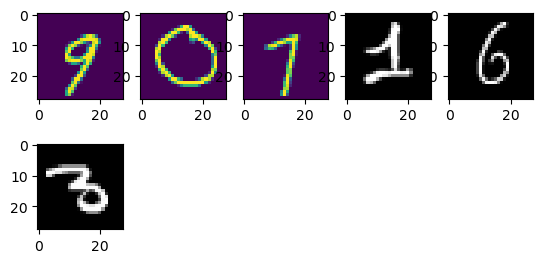

In [3]:
import matplotlib.pyplot as plt

# Plotting a few random photos in grayscale and the preset formats.
plt.subplot(351)
plt.imshow(X_train[57])
plt.subplot(352)
plt.imshow(X_train[68])
plt.subplot(353)
plt.imshow(X_train[42])
plt.subplot(354)
plt.imshow(X_train[24], cmap=plt.get_cmap('gray'))
plt.subplot(355)
plt.imshow(X_train[18], cmap=plt.get_cmap('gray'))
plt.subplot(356)
plt.imshow(X_train[30], cmap=plt.get_cmap('gray'))

# displaying the plot
plt.show()

In order to determine whether or not the input photos from the dataset need to be preprocessed before being given as input to the neural networks, we also need to look at their dimensions.

In [4]:
# printing the shape of training dataset
print ('Shape of the training dataset:') 
print (X_train.shape)

# printing the shape of testing dataset
print ('Shape of the testing dataset:')
print (X_test.shape)

Shape of the training dataset:
(60000, 28, 28)
Shape of the testing dataset:
(10000, 28, 28)


## **Data Preprocessing**

### Reshaping Dimesions
Our next step is to prepare the inputs for Keras. Our input is organised as a three-dimensional array in the form of (60000, 28, 28), which denotes that the photos in the dataset are 28x28 in height and depth. However, keras requires a 4d array for input. The depth of the image requires that we add a dimension. MNIST images only have a depth of 1, while a full-color image with all three RGB channels will have three. By simply utilising the **reshape()** method on the NumPy array, we can easily add this dimension.

In [5]:
# Reshaping the input data 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Printing the new dimensions
print('Dimensions after reshaping:')
print(X_train.shape)

Dimensions after reshaping:
(60000, 1, 28, 28)


### Normalizing the Pixel values
Each pixel that makes up a picture that is stored on a computer has a pixel value that specifies its brightness and/or intended colour. The pixel value in binary images is often a 1-bit number that denotes either the foreground or the background. The pixel value for a grayscale image is a single number that denotes the brightness of the pixel. The byte image, which stores this number as an 8-bit integer with a possible range of values from 0 to 255, is the most popular pixel format. Normally, 255 is considered to be white while zero is considered to be black. The many colours of grey are made up of values in between. When utilising neural network models, scaling the input values is usually always a smart idea. We can rapidly normalise the pixel values to the range [0, 1] because the scale is widely understood and well handled. To do this, divide each value by the highest possible value, 255.

In [6]:
# converting the data type to float64 
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Normalizing pixel values
X_train = X_train/255
X_test = X_test/255

### Preprocessing the class labels for Keras
This is a problem of multi-class classification classification. 0 to 9 is the range of integers in the output variable. We need the labels to be in 10 different classes, but right now they are all in one array with 10 classes. We only need to use one hot encoding to solve this. In Keras, there is a built-in assistance method called **np utils.to categorical()**.

In [7]:
# importing the libraries needed for encoding
from keras.utils import np_utils

# Encoding the labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## **Model architecture terminology**
A high-level API is offered by the Keras layers module, which makes it simple to build a neural network. It offers techniques for adding activation functions, applying dropout regularisation, and creating dense (completely linked) layers and convolutional layers. This section teaches you how to construct a convolutional neural network model using layers to identify the handwritten digits in the MNIST data set.

###  What is CNN?
For image classification tasks, convolutional neural networks (CNNs) are the most advanced model architecture currently available. CNNs employ a succession of filters to extract and learn higher-level characteristics from an image's raw pixel data, which the model can subsequently use for categorization. Increasing the depth of the image while reducing its height and depth is our goal as we add more layers. The depth of the image determines how many patterns the model will discover.

In [8]:
# importing necessary libraries for establishing the model architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
from subprocess import check_output
K.set_image_data_format('channels_first')

# Defining the model architecture
model = Sequential()
model.add(Convolution2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 26, 26)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 13, 13)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 11, 11)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 5, 5)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 64, 5, 5)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## Compiling and Fitting the Model

In [9]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fitting the model on training data
model.fit(X_train, Y_train, batch_size=200, epochs=2, verbose=1)

Epoch 1/2
300/300 [==============================] - 19s 60ms/step - loss: 0.3924 - accuracy: 0.8772
Epoch 2/2
300/300 [==============================] - 18s 59ms/step - loss: 0.1282 - accuracy: 0.9615


## Evaluating the model on test data

In [10]:
from keras.layers import UpSampling2D


# Evaluating the model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print ("The test set's error rate and accuracy are as follows : ")
print (score)
print(UpSampling2D(size=(2, 2), data_format=None))

The test set's error rate and accuracy are as follows : 
[0.050385069102048874, 0.9829999804496765]
